In [ ]:
# 整形結果格納用ファイル作成
!echo -e "filename\tarticle"$(for category in $(basename -a `find ./text -type d` | grep -v text | sort); do echo -n "\t"; echo -n $category; done) > ./text/livedoor.tsv

In [ ]:
# カテゴリごとに格納
!for filename in `basename -a ./text/dokujo-tsushin/dokujo-tsushin-*`; do echo -n "$filename"; echo -ne "\t"; echo -n `sed -e '1,3d' ./text/dokujo-tsushin/$filename`; echo -e "\t1\t0\t0\t0\t0\t0\t0\t0\t0"; done >> ./text/livedoor.tsv
!for filename in `basename -a ./text/it-life-hack/it-life-hack-*`; do echo -n "$filename"; echo -ne "\t"; echo -n `sed -e '1,3d' ./text/it-life-hack/$filename`; echo -e "\t0\t1\t0\t0\t0\t0\t0\t0\t0"; done >> ./text/livedoor.tsv
!for filename in `basename -a ./text/kaden-channel/kaden-channel-*`; do echo -n "$filename"; echo -ne "\t"; echo -n `sed -e '1,3d' ./text/kaden-channel/$filename`; echo -e "\t0\t0\t1\t0\t0\t0\t0\t0\t0"; done >> ./text/livedoor.tsv
!for filename in `basename -a ./text/livedoor-homme/livedoor-homme-*`; do echo -n "$filename"; echo -ne "\t"; echo -n `sed -e '1,3d' ./text/livedoor-homme/$filename`; echo -e "\t0\t0\t0\t1\t0\t0\t0\t0\t0"; done >> ./text/livedoor.tsv
!for filename in `basename -a ./text/movie-enter/movie-enter-*`; do echo -n "$filename"; echo -ne "\t"; echo -n `sed -e '1,3d' ./text/movie-enter/$filename`; echo -e "\t0\t0\t0\t0\t1\t0\t0\t0\t0"; done >> ./text/livedoor.tsv
!for filename in `basename -a ./text/peachy/peachy-*`; do echo -n "$filename"; echo -ne "\t"; echo -n `sed -e '1,3d' ./text/peachy/$filename`; echo -e "\t0\t0\t0\t0\t0\t1\t0\t0\t0"; done >> ./text/livedoor.tsv
!for filename in `basename -a ./text/smax/smax-*`; do echo -n "$filename"; echo -ne "\t"; echo -n `sed -e '1,3d' ./text/smax/$filename`; echo -e "\t0\t0\t0\t0\t0\t0\t1\t0\t0"; done >> ./text/livedoor.tsv
!for filename in `basename -a ./text/sports-watch/sports-watch-*`; do echo -n "$filename"; echo -ne "\t"; echo -n `sed -e '1,3d' ./text/sports-watch/$filename`; echo -e "\t0\t0\t0\t0\t0\t0\t0\t1\t0"; done >> ./text/livedoor.tsv
!for filename in `basename -a ./text/topic-news/topic-news-*`; do echo -n "$filename"; echo -ne "\t"; echo -n `sed -e '1,3d' ./text/topic-news/$filename`; echo -e "\t0\t0\t0\t0\t0\t0\t0\t0\t1"; done >> ./text/livedoor.tsv

In [ ]:
# 確認
!head -10 ./text/livedoor.tsv

filename	article	dokujo-tsushin	it-life-hack	kaden-channel	livedoor-homme	movie-enter	peachy	smax	sports-watch	topic-news
dokujo-tsushin-4778030.txt	　もうすぐジューン・ブライドと呼ばれる６月。独女の中には自分の式はまだなのに呼ばれてばかり……という「お祝い貧乏」状態の人も多いのではないだろうか？　さらに出席回数を重ねていくと、こんなお願いごとをされることも少なくない。 　「お願いがあるんだけど……友人代表のスピーチ、やってくれないかな？」 　さてそんなとき、独女はどう対応したらいいか？ 　最近だとインターネット等で検索すれば友人代表スピーチ用の例文サイトがたくさん出てくるので、それらを参考にすれば、無難なものは誰でも作成できる。しかし由利さん（33歳）はネットを参考にして作成したものの「これで本当にいいのか不安でした。一人暮らしなので聞かせて感想をいってくれる人もいないし、かといって他の友人にわざわざ聞かせるのもどうかと思うし……」ということで活用したのが、なんとインターネットの悩み相談サイトに。そこに作成したスピーチ文を掲載し「これで大丈夫か添削してください」とメッセージを送ったというのである。 　「一晩で3人位の人が添削してくれましたよ。ちなみに自分以外にもそういう人はたくさんいて、その相談サイトには同じように添削をお願いする投稿がいっぱいありました」（由利さん）。ためしに教えてもらったそのサイトをみてみると、確かに「結婚式のスピーチの添削お願いします」という投稿が1000件を超えるくらいあった。めでたい結婚式の影でこんなネットコミュニティがあったとは知らなかった。 　しかし「事前にお願いされるスピーチなら準備ができるしまだいいですよ。一番嫌なのは何といってもサプライズスピーチ！」と語るのは昨年だけで10万以上お祝いにかかったというお祝い貧乏独女の薫さん（35歳） 　「私は基本的に人前で話すのが苦手なんですよ。だからいきなり指名されるとしどろもどろになって何もいえなくなる。そうすると自己嫌悪に陥って終わった後でもまったく楽しめなくなりますね」 　 　サプライズスピーチのメリットとしては、準備していない状態なので、フ

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# データの読込
df = pd.read_csv('./text/livedoor.tsv', sep='\t')

# データの分割
categories = ['dokujo-tsushin', 'it-life-hack', 'kaden-channel', 'livedoor-homme', 'movie-enter', 'peachy', 'smax', 'sports-watch', 'topic-news']
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df[categories])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test[categories])
train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# 事例数の確認
table = [['train'] + [train[category].sum() for category in categories],
         ['valid'] + [valid[category].sum() for category in categories],
         ['test'] + [test[category].sum() for category in categories]]
headers = ['data'] + categories
print(tabulate(table, headers, tablefmt='grid'))

+--------+------------------+----------------+-----------------+------------------+---------------+----------+--------+----------------+--------------+
| data   |   dokujo-tsushin |   it-life-hack |   kaden-channel |   livedoor-homme |   movie-enter |   peachy |   smax |   sports-watch |   topic-news |
+========+==================+================+=================+==================+===============+==========+========+================+==============+
| train  |              696 |            696 |             691 |              409 |           696 |      673 |    696 |            720 |          616 |
+--------+------------------+----------------+-----------------+------------------+---------------+----------+--------+----------------+--------------+
| valid  |               87 |             87 |              87 |               51 |            87 |       84 |     87 |             90 |           77 |
+--------+------------------+----------------+-----------------+------------------+-----

In [ ]:
pip install transformers["ja"]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 14.6 MB/s 
     |████████████████████████████████| 163 kB 69.5 MB/s 
     |████████████████████████████████| 7.6 MB 55.9 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 47.4 MB 108 kB/s 
     |████████████████████████████████| 2.2 MB 53.5 MB/s 
     |████████████████████████████████| 13.4 MB 42.0 MB/s 
     |████████████████████████████████| 583 kB 69.8 MB/s 
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556723 sha256=006959696634fe457ad3982fb3b599076dec7576c5b9d760de17292185738623
  Stored in directory: /root/.cache/pip/wheels/33/8b/99/cf0d27191876637cd3639a560f93aa982d7855ce826c94348b
  Created wheel for sudachidict-core: filename=SudachiDict_core-20220729-py3-none-any.whl size=71570387 sha256=4ede1b8e5d23bb04a4ca5b8b6dea1ea1b1d8341c00f6140833167fc0158b8e30
  

In [ ]:
import numpy as np
from transformers import AutoModel, AutoTokenizer
import torch
from torch.utils.data import Dataset, DataLoader
from torch import optim
from torch import cuda
import time
from tqdm import tqdm
from matplotlib import pyplot as plt

In [ ]:
# 事前学習済みモデルの指定
pretrained = 'cl-tohoku/bert-base-japanese-whole-word-masking'

In [ ]:
# Datasetの定義
class NewsDataset(Dataset):
  def __init__(self, X, y, tokenizer, max_len):
    self.X = X
    self.y = y
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):  # len(Dataset)で返す値を指定
    return len(self.y)

  def __getitem__(self, index):  # Dataset[index]で返す値を指定
    text = self.X[index]
    inputs = self.tokenizer.encode_plus(
      text,
      add_special_tokens=True,
      max_length=self.max_len,
      truncation=True,
      padding='max_length'
    )
    ids = inputs['input_ids']
    mask = inputs['attention_mask']

    return {
      'ids': torch.LongTensor(ids),
      'mask': torch.LongTensor(mask),
      'labels': torch.Tensor(self.y[index])
    }

In [ ]:
# 最大系列長の指定
MAX_LEN = 128

# tokenizerの取得
tokenizer = AutoTokenizer.from_pretrained(pretrained)

# Datasetの作成
dataset_train = NewsDataset(train['article'], train[categories].values, tokenizer, MAX_LEN)
dataset_valid = NewsDataset(valid['article'], valid[categories].values, tokenizer, MAX_LEN)
dataset_test = NewsDataset(test['article'], test[categories].values, tokenizer, MAX_LEN)

for var in dataset_train[0]:
  print(f'{var}: {dataset_train[0][var]}')

Downloading:   0%|          | 0.00/110 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/479 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/258k [00:00<?, ?B/s]

ids: tensor([    2,  1953,    14,  7454,   969,     5,  3596,    18,    15, 29105,
        28475,     7,  1755,  5781,   440,    26,    20,    16,    33,   757,
        29517,     5,   993,    12,    31,     6,   109, 28653, 20743,     8,
         4109,    16,  1076,  4914,    13,    15,    10,  4706, 29595,     9,
          178, 28555,   178, 28555,    26,   191, 28461,   312,     6,   704,
            7,   139,  7755,    53,    28,  3359, 28812, 28457,    16,  8009,
         4830, 15743,  1568,    14,  3904,     5, 13770,    12,  4749,   704,
        28552,    11,  6565,   972,    75,    13,  3083,    16,    28,     6,
          683, 28765,    12,     9,  2825,  2203,  4706, 29595,     5,  9462,
          135, 28524,  1964,     8,  5120,  2881,    49,  9462,   135, 28524,
         2881,     6,  8616, 28502,  4147,  3195,  8778,     5, 24064, 28485,
           11,  4722,  9531,    15,    16,    33,    53,    28,   707,  4830,
         6758,  6769,  1058,     8,   962,     6,  5233,   

In [ ]:
# BERT分類モデルの定義
class BERTClass(torch.nn.Module):
  def __init__(self, pretrained, drop_rate, otuput_size):
    super().__init__()
    self.bert = AutoModel.from_pretrained(pretrained)
    self.drop = torch.nn.Dropout(drop_rate)
    self.fc = torch.nn.Linear(768, otuput_size)  # BERTの出力に合わせて768次元を指定

  def forward(self, ids, mask):
    _, out = self.bert(ids, attention_mask=mask, return_dict=False)
    out = self.fc(self.drop(out))
    return out

In [ ]:
def calculate_loss_and_accuracy(model, loader, device, criterion=None):
  """ 損失・正解率を計算"""
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for data in loader:
      # デバイスの指定
      ids = data['ids'].to(device)
      mask = data['mask'].to(device)
      labels = data['labels'].to(device)

      # 順伝播
      outputs = model(ids, mask)

      # 損失計算
      if criterion != None:
        loss += criterion(outputs, labels).item()

      # 正解率計算
      pred = torch.argmax(outputs, dim=-1).cpu().numpy() # バッチサイズの長さの予測ラベル配列
      labels = torch.argmax(labels, dim=-1).cpu().numpy()  # バッチサイズの長さの正解ラベル配列
      total += len(labels)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total


def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  """モデルの学習を実行し、損失・正解率のログを返す"""
  # デバイスの指定
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for data in tqdm(dataloader_train):
      # デバイスの指定
      ids = data['ids'].to(device)
      mask = data['mask'].to(device)
      labels = data['labels'].to(device)

      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      outputs = model(ids, mask)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, dataloader_train, device, criterion=criterion)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, dataloader_valid, device, criterion=criterion)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec')

  return {'train': log_train, 'valid': log_valid}

In [ ]:
# パラメータの設定
DROP_RATE = 0.4
OUTPUT_SIZE = 9
BATCH_SIZE = 16
NUM_EPOCHS = 4
LEARNING_RATE = 2e-5

# モデルの定義
model = BERTClass(pretrained, DROP_RATE, OUTPUT_SIZE)

# 損失関数の定義
criterion = torch.nn.BCEWithLogitsLoss()

# オプティマイザの定義
optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)

# デバイスの指定
device = 'cuda' if cuda.is_available() else 'cpu'

# モデルの学習
log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, device=device)

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 369/369 [02:26<00:00,  2.52it/s]


epoch: 1, loss_train: 0.1062, accuracy_train: 0.8634, loss_valid: 0.1244, accuracy_valid: 0.8114, 218.9101sec


100%|██████████| 369/369 [02:28<00:00,  2.48it/s]


epoch: 2, loss_train: 0.0513, accuracy_train: 0.9493, loss_valid: 0.0879, accuracy_valid: 0.8765, 222.3253sec


100%|██████████| 369/369 [02:29<00:00,  2.47it/s]


epoch: 3, loss_train: 0.0328, accuracy_train: 0.9689, loss_valid: 0.0927, accuracy_valid: 0.8643, 222.3906sec


100%|██████████| 369/369 [02:30<00:00,  2.46it/s]


epoch: 4, loss_train: 0.0167, accuracy_train: 0.9903, loss_valid: 0.0786, accuracy_valid: 0.8860, 223.0710sec


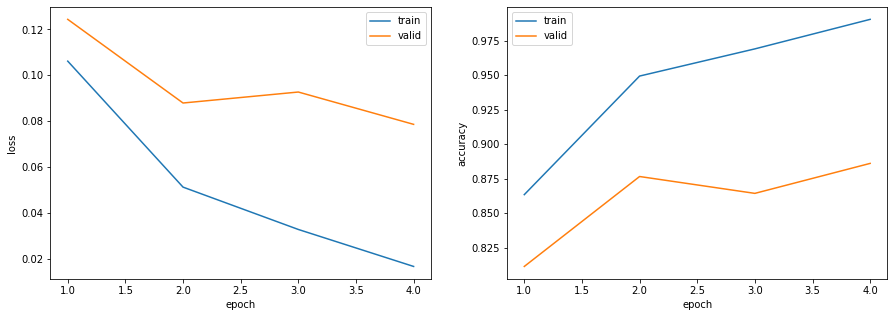

In [ ]:
# ログの可視化
x_axis = [x for x in range(1, len(log['train']) + 1)]
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(x_axis, np.array(log['train']).T[0], label='train')
ax[0].plot(x_axis, np.array(log['valid']).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(x_axis, np.array(log['train']).T[1], label='train')
ax[1].plot(x_axis, np.array(log['valid']).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [ ]:
# 正解率の算出
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=False)
dataloader_valid = DataLoader(dataset_valid, batch_size=1, shuffle=False)
dataloader_test = DataLoader(dataset_test, batch_size=1, shuffle=False)

print(f'正解率（学習データ）：{calculate_loss_and_accuracy(model, dataloader_train, device)[1]:.3f}')
print(f'正解率（検証データ）：{calculate_loss_and_accuracy(model, dataloader_valid, device)[1]:.3f}')
print(f'正解率（評価データ）：{calculate_loss_and_accuracy(model, dataloader_test, device)[1]:.3f}')

正解率（学習データ）：0.990
正解率（検証データ）：0.886
正解率（評価データ）：0.896
